In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

In [2]:
df = pd.read_csv('/content/Parkinsson disease.csv')

In [3]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


from matplotlib import pyplot as plt
df['MDVP:Fo(Hz)'].plot(kind='hist', bins=20, title='MDVP:Fo(Hz)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['MDVP:Fhi(Hz)'].plot(kind='hist', bins=20, title='MDVP:Fhi(Hz)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['MDVP:Flo(Hz)'].plot(kind='hist', bins=20, title='MDVP:Flo(Hz)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['MDVP:Jitter(%)'].plot(kind='hist', bins=20, title='MDVP:Jitter(%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='MDVP:Fo(Hz)', y='MDVP:Fhi(Hz)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='MDVP:Fhi(Hz)', y='MDVP:Flo(Hz)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='MDVP:Flo(Hz)', y='MDVP:Jitter(%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='MDVP:Jitter(%)', y='MDVP:Jitter(Abs)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['MDVP:Fo(Hz)'].plot(kind='line', figsize=(8, 4), title='MDVP:Fo(Hz)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['MDVP:Fhi(Hz)'].plot(kind='line', figsize=(8, 4), title='MDVP:Fhi(Hz)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['MDVP:Flo(Hz)'].plot(kind='line', figsize=(8, 4), title='MDVP:Flo(Hz)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['MDVP:Jitter(%)'].plot(kind='line', figsize=(8, 4), title='MDVP:Jitter(%)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [4]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


from matplotlib import pyplot as plt
_df_0['MDVP:Fo(Hz)'].plot(kind='hist', bins=20, title='MDVP:Fo(Hz)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['MDVP:Fhi(Hz)'].plot(kind='hist', bins=20, title='MDVP:Fhi(Hz)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['MDVP:Flo(Hz)'].plot(kind='hist', bins=20, title='MDVP:Flo(Hz)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['MDVP:Jitter(%)'].plot(kind='hist', bins=20, title='MDVP:Jitter(%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='MDVP:Fo(Hz)', y='MDVP:Fhi(Hz)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='MDVP:Fhi(Hz)', y='MDVP:Flo(Hz)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='MDVP:Flo(Hz)', y='MDVP:Jitter(%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='MDVP:Jitter(%)', y='MDVP:Jitter(Abs)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MDVP:Jitter(Abs)']
  ys = series['MDVP:Fo(Hz)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('MDVP:Jitter(Abs)', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('name')):
  _plot_series(series, series_name, i)
  fig.legend(title='name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MDVP:Jitter(Abs)')
_ = plt.ylabel('MDVP:Fo(Hz)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MDVP:Jitter(Abs)']
  ys = series['MDVP:Fhi(Hz)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('MDVP:Jitter(Abs)', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('name')):
  _plot_series(series, series_name, i)
  fig.legend(title='name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MDVP:Jitter(Abs)')
_ = plt.ylabel('MDVP:Fhi(Hz)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MDVP:Jitter(Abs)']
  ys = series['MDVP:Flo(Hz)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('MDVP:Jitter(Abs)', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('name')):
  _plot_series(series, series_name, i)
  fig.legend(title='name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MDVP:Jitter(Abs)')
_ = plt.ylabel('MDVP:Flo(Hz)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MDVP:Jitter(Abs)']
  ys = series['MDVP:Jitter(%)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('MDVP:Jitter(Abs)', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('name')):
  _plot_series(series, series_name, i)
  fig.legend(title='name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MDVP:Jitter(Abs)')
_ = plt.ylabel('MDVP:Jitter(%)')

from matplotlib import pyplot as plt
_df_13['MDVP:Fo(Hz)'].plot(kind='line', figsize=(8, 4), title='MDVP:Fo(Hz)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['MDVP:Fhi(Hz)'].plot(kind='line', figsize=(8, 4), title='MDVP:Fhi(Hz)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['MDVP:Flo(Hz)'].plot(kind='line', figsize=(8, 4), title='MDVP:Flo(Hz)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['MDVP:Jitter(%)'].plot(kind='line', figsize=(8, 4), title='MDVP:Jitter(%)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='MDVP:Fo(Hz)', y='name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='MDVP:Fhi(Hz)', y='name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='MDVP:Flo(Hz)', y='name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='MDVP:Jitter(%)', y='name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


from matplotlib import pyplot as plt
_df_21['MDVP:Fo(Hz)'].plot(kind='hist', bins=20, title='MDVP:Fo(Hz)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22['MDVP:Fhi(Hz)'].plot(kind='hist', bins=20, title='MDVP:Fhi(Hz)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23['MDVP:Flo(Hz)'].plot(kind='hist', bins=20, title='MDVP:Flo(Hz)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['MDVP:Jitter(%)'].plot(kind='hist', bins=20, title='MDVP:Jitter(%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25.plot(kind='scatter', x='MDVP:Fo(Hz)', y='MDVP:Fhi(Hz)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x='MDVP:Fhi(Hz)', y='MDVP:Flo(Hz)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27.plot(kind='scatter', x='MDVP:Flo(Hz)', y='MDVP:Jitter(%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='MDVP:Jitter(%)', y='MDVP:Jitter(Abs)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29['MDVP:Fo(Hz)'].plot(kind='line', figsize=(8, 4), title='MDVP:Fo(Hz)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['MDVP:Fhi(Hz)'].plot(kind='line', figsize=(8, 4), title='MDVP:Fhi(Hz)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['MDVP:Flo(Hz)'].plot(kind='line', figsize=(8, 4), title='MDVP:Flo(Hz)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_32['MDVP:Jitter(%)'].plot(kind='line', figsize=(8, 4), title='MDVP:Jitter(%)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
df.shape

(195, 24)

In [8]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [9]:
df.corr()

<ipython-input-9-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


from matplotlib import pyplot as plt
_df_33['MDVP:Fo(Hz)'].plot(kind='hist', bins=20, title='MDVP:Fo(Hz)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34['MDVP:Fhi(Hz)'].plot(kind='hist', bins=20, title='MDVP:Fhi(Hz)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35['MDVP:Flo(Hz)'].plot(kind='hist', bins=20, title='MDVP:Flo(Hz)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36['MDVP:Jitter(%)'].plot(kind='hist', bins=20, title='MDVP:Jitter(%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='MDVP:Fo(Hz)', y='MDVP:Fhi(Hz)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38.plot(kind='scatter', x='MDVP:Fhi(Hz)', y='MDVP:Flo(Hz)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39.plot(kind='scatter', x='MDVP:Flo(Hz)', y='MDVP:Jitter(%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_40.plot(kind='scatter', x='MDVP:Jitter(%)', y='MDVP:Jitter(Abs)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_41['MDVP:Fo(Hz)'].plot(kind='line', figsize=(8, 4), title='MDVP:Fo(Hz)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_42['MDVP:Fhi(Hz)'].plot(kind='line', figsize=(8, 4), title='MDVP:Fhi(Hz)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_43['MDVP:Flo(Hz)'].plot(kind='line', figsize=(8, 4), title='MDVP:Flo(Hz)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_44['MDVP:Jitter(%)'].plot(kind='line', figsize=(8, 4), title='MDVP:Jitter(%)')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-11-350e8e15e976>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

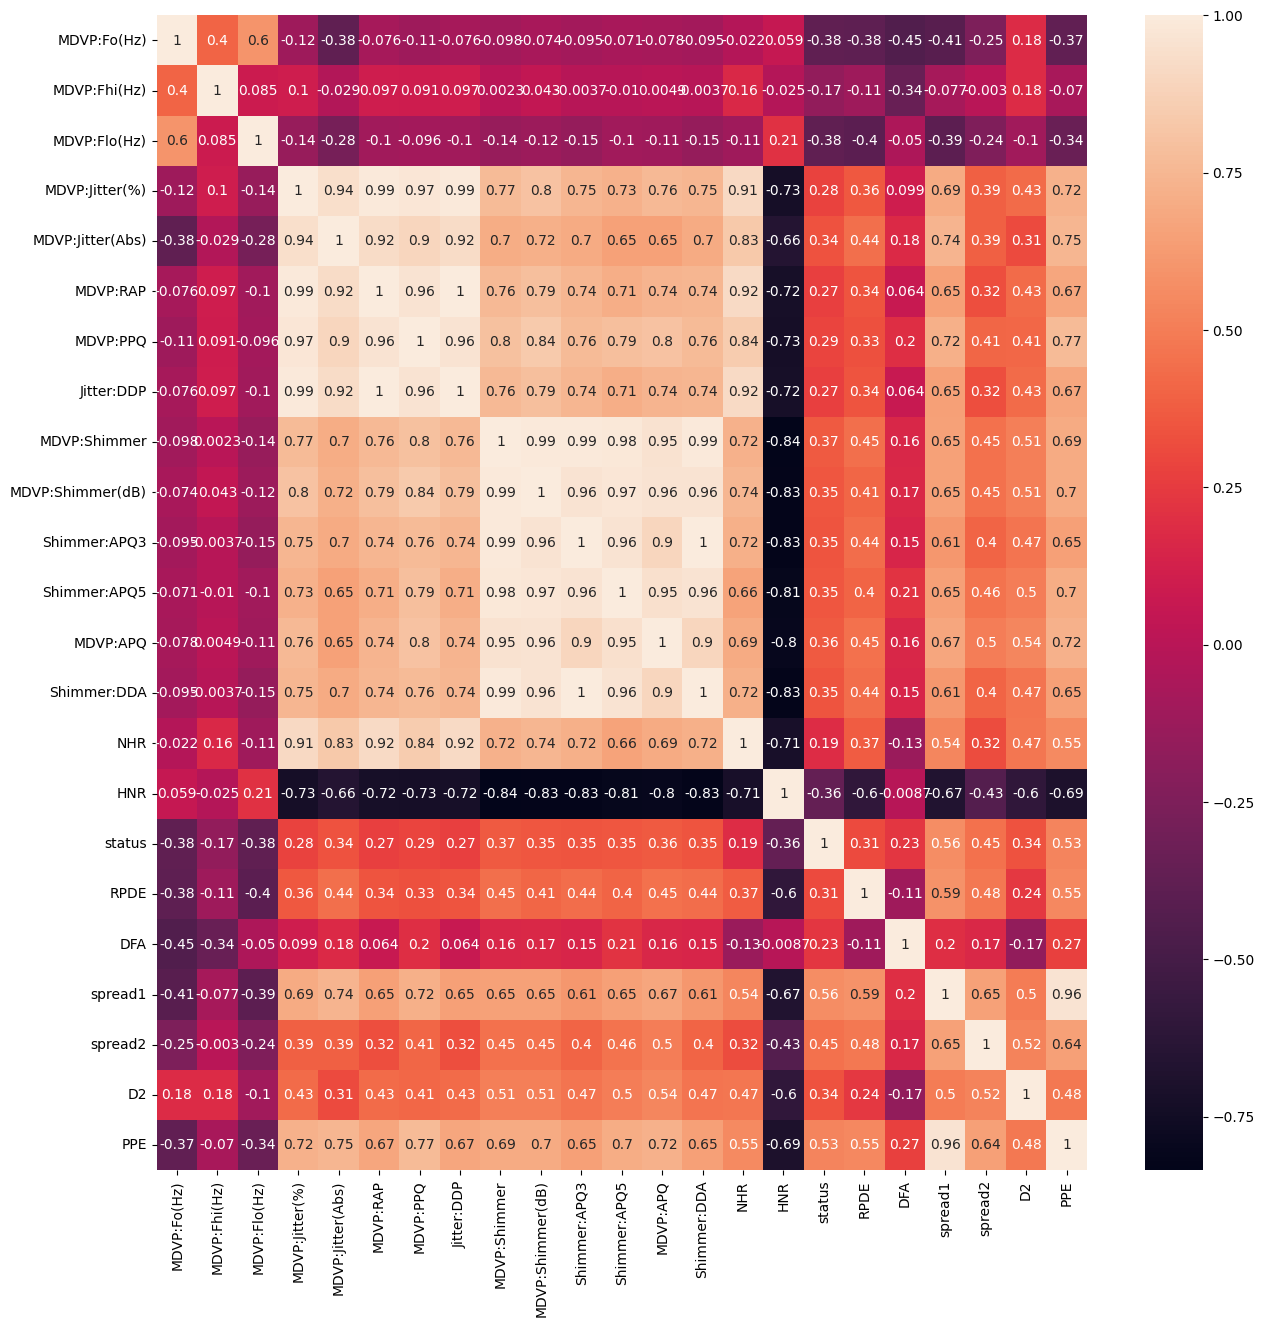

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

In [12]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [13]:
df.groupby('status').mean()

<ipython-input-13-b48f8e817573>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('status').mean()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


from matplotlib import pyplot as plt
_df_45['MDVP:Fo(Hz)'].plot(kind='hist', bins=20, title='MDVP:Fo(Hz)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_46['MDVP:Fhi(Hz)'].plot(kind='hist', bins=20, title='MDVP:Fhi(Hz)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_47['MDVP:Flo(Hz)'].plot(kind='hist', bins=20, title='MDVP:Flo(Hz)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_48['MDVP:Jitter(%)'].plot(kind='hist', bins=20, title='MDVP:Jitter(%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_49.plot(kind='scatter', x='MDVP:Fo(Hz)', y='MDVP:Fhi(Hz)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_50.plot(kind='scatter', x='MDVP:Fhi(Hz)', y='MDVP:Flo(Hz)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_51.plot(kind='scatter', x='MDVP:Flo(Hz)', y='MDVP:Jitter(%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_52.plot(kind='scatter', x='MDVP:Jitter(%)', y='MDVP:Jitter(Abs)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MDVP:Jitter(%)']
  ys = series['MDVP:Fo(Hz)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_53.sort_values('MDVP:Jitter(%)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MDVP:Jitter(%)')
_ = plt.ylabel('MDVP:Fo(Hz)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MDVP:Jitter(%)']
  ys = series['MDVP:Fhi(Hz)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_54.sort_values('MDVP:Jitter(%)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MDVP:Jitter(%)')
_ = plt.ylabel('MDVP:Fhi(Hz)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MDVP:Jitter(%)']
  ys = series['MDVP:Flo(Hz)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_55.sort_values('MDVP:Jitter(%)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MDVP:Jitter(%)')
_ = plt.ylabel('MDVP:Flo(Hz)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MDVP:Jitter(%)']
  ys = series['HNR']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_56.sort_values('MDVP:Jitter(%)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MDVP:Jitter(%)')
_ = plt.ylabel('HNR')

from matplotlib import pyplot as plt
_df_57['MDVP:Fo(Hz)'].plot(kind='line', figsize=(8, 4), title='MDVP:Fo(Hz)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_58['MDVP:Fhi(Hz)'].plot(kind='line', figsize=(8, 4), title='MDVP:Fhi(Hz)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_59['MDVP:Flo(Hz)'].plot(kind='line', figsize=(8, 4), title='MDVP:Flo(Hz)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_60['MDVP:Jitter(%)'].plot(kind='line', figsize=(8, 4), title='MDVP:Jitter(%)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.drop(columns='name' , axis=1 , inplace = True)

In [140]:
x = df.drop(columns = 'status' , axis=1)
y = df['status']

In [141]:
print(x)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [33]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [34]:
X_train , X_test , Y_train , Y_test = train_test_split(x , y , test_size = 0.2 , stratify=y, random_state = 2)

In [35]:
print('Training Data : ' , X_train.shape , Y_train.shape)
print('Testing Data : ' , X_test.shape , Y_test.shape)

Training Data :  (156, 22) (156,)
Testing Data :  (39, 22) (39,)


In [36]:
from sklearn.preprocessing import StandardScaler

In [142]:
print(X_train.dtypes)

MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


In [37]:
scale = StandardScaler()


X_train_new = scale.fit(X_train)
X_train_new = scale.transform(X_train)
X_test_new = scale.transform(X_test)

In [38]:
X_train_new = pd.DataFrame(X_train_new , columns = X_train.columns)
X_test_new = pd.DataFrame(X_test_new , columns = X_test.columns)

In [119]:
X_train.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,...,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,153.106833,196.181846,115.897801,0.006214,0.000044,0.003296,0.003497,0.009888,0.030039,0.287026,...,0.024619,0.047455,0.023601,21.834045,0.499477,0.720981,-5.671655,0.229403,2.374868,0.209198
std,41.382857,91.848604,43.320290,0.004646,0.000032,0.002796,0.002810,0.008387,0.019094,0.200894,...,0.017850,0.030310,0.036450,4.385500,0.102696,0.056685,1.098786,0.084768,0.394739,0.091899
min,88.333000,102.145000,65.476000,0.001740,0.000009,0.000750,0.000960,0.002250,0.009540,0.085000,...,0.007190,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,116.806500,134.335500,85.176750,0.003545,0.000028,0.001690,0.001915,0.005070,0.016622,0.153500,...,0.013165,0.025360,0.006027,19.383000,0.427746,0.676055,-6.433189,0.174766,2.076311,0.140695
50%,148.302500,174.344500,103.732500,0.004955,0.000035,0.002520,0.002725,0.007555,0.023605,0.222000,...,0.018285,0.039155,0.011745,21.904500,0.496717,0.724630,-5.707629,0.220753,2.352425,0.197122
75%,183.653750,222.082250,136.028250,0.007302,0.000060,0.003747,0.003900,0.011250,0.037260,0.352750,...,0.029545,0.057193,0.024445,24.929250,0.586366,0.763456,-5.019686,0.278956,2.632503,0.259827
max,260.105000,592.030000,239.170000,0.031070,0.000220,0.018540,0.019580,0.055630,0.119080,1.302000,...,0.137780,0.169420,0.259300,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


from matplotlib import pyplot as plt
_df_73['MDVP:Fo(Hz)'].plot(kind='hist', bins=20, title='MDVP:Fo(Hz)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_74['MDVP:Fhi(Hz)'].plot(kind='hist', bins=20, title='MDVP:Fhi(Hz)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_75['MDVP:Flo(Hz)'].plot(kind='hist', bins=20, title='MDVP:Flo(Hz)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_76['MDVP:Jitter(%)'].plot(kind='hist', bins=20, title='MDVP:Jitter(%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_77.plot(kind='scatter', x='MDVP:Fo(Hz)', y='MDVP:Fhi(Hz)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_78.plot(kind='scatter', x='MDVP:Fhi(Hz)', y='MDVP:Flo(Hz)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_79.plot(kind='scatter', x='MDVP:Flo(Hz)', y='MDVP:Jitter(%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_80.plot(kind='scatter', x='MDVP:Jitter(%)', y='MDVP:Jitter(Abs)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_81['MDVP:Fo(Hz)'].plot(kind='line', figsize=(8, 4), title='MDVP:Fo(Hz)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_82['MDVP:Fhi(Hz)'].plot(kind='line', figsize=(8, 4), title='MDVP:Fhi(Hz)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_83['MDVP:Flo(Hz)'].plot(kind='line', figsize=(8, 4), title='MDVP:Flo(Hz)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_84['MDVP:Jitter(%)'].plot(kind='line', figsize=(8, 4), title='MDVP:Jitter(%)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [120]:
X_train_new.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,156.000000,1.560000e+02,...,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02
mean,1.821904e-16,3.643809e-16,-1.764970e-16,5.693451e-18,2.917894e-17,8.540177e-17,1.480297e-16,-2.220446e-16,0.000000,-7.970832e-17,...,5.693451e-17,1.138690e-16,-6.832142e-17,4.839434e-16,-3.245267e-16,9.935073e-16,-4.156220e-16,-2.846726e-16,2.618988e-16,-1.594166e-16
std,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221,1.003221e+00,...,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00
min,-1.570275e+00,-1.027122e+00,-1.167679e+00,-9.660072e-01,-1.098691e+00,-9.135152e-01,-9.057726e-01,-9.136289e-01,-1.077046,-1.008871e+00,...,-9.795630e-01,-1.119227e+00,-6.316654e-01,-3.063774e+00,-2.372921e+00,-2.596314e+00,-2.093869e+00,-2.640698e+00,-2.418426e+00,-1.797507e+00
25%,-8.800080e-01,-6.755196e-01,-7.114447e-01,-5.762491e-01,-5.118280e-01,-5.762258e-01,-5.648550e-01,-5.763315e-01,-0.704917,-6.667974e-01,...,-6.437567e-01,-7.313112e-01,-4.836612e-01,-5.606975e-01,-7.007329e-01,-7.951055e-01,-6.953001e-01,-6.466223e-01,-7.587781e-01,-7.478243e-01
50%,-1.164687e-01,-2.385194e-01,-2.817267e-01,-2.717843e-01,-2.739103e-01,-2.784064e-01,-2.756998e-01,-2.791031e-01,-0.338043,-3.247236e-01,...,-3.560030e-01,-2.747162e-01,-3.262993e-01,1.611721e-02,-2.696053e-02,6.459135e-02,-3.284509e-02,-1.023638e-01,-5.704022e-02,-1.318275e-01
75%,7.405312e-01,2.828984e-01,4.661853e-01,2.351173e-01,5.191485e-01,1.620434e-01,1.437538e-01,1.628523e-01,0.379417,3.282128e-01,...,2.768304e-01,3.222997e-01,2.324093e-02,7.080547e-01,8.488048e-01,7.517258e-01,5.952651e-01,5.864605e-01,6.547740e-01,5.526923e-01
max,2.593895e+00,4.323670e+00,2.854764e+00,5.367293e+00,5.594725e+00,5.469867e+00,5.741228e+00,5.471101e+00,4.678397,5.068556e+00,...,6.359842e+00,4.036872e+00,6.487121e+00,2.565060e+00,1.813823e+00,1.846053e+00,2.956035e+00,2.616571e+00,3.294488e+00,3.473290e+00


from matplotlib import pyplot as plt
_df_61['MDVP:Fo(Hz)'].plot(kind='hist', bins=20, title='MDVP:Fo(Hz)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_62['MDVP:Fhi(Hz)'].plot(kind='hist', bins=20, title='MDVP:Fhi(Hz)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_63['MDVP:Flo(Hz)'].plot(kind='hist', bins=20, title='MDVP:Flo(Hz)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_64['MDVP:Jitter(%)'].plot(kind='hist', bins=20, title='MDVP:Jitter(%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_65.plot(kind='scatter', x='MDVP:Fo(Hz)', y='MDVP:Fhi(Hz)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_66.plot(kind='scatter', x='MDVP:Fhi(Hz)', y='MDVP:Flo(Hz)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_67.plot(kind='scatter', x='MDVP:Flo(Hz)', y='MDVP:Jitter(%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_68.plot(kind='scatter', x='MDVP:Jitter(%)', y='MDVP:Jitter(Abs)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_69['MDVP:Fo(Hz)'].plot(kind='line', figsize=(8, 4), title='MDVP:Fo(Hz)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_70['MDVP:Fhi(Hz)'].plot(kind='line', figsize=(8, 4), title='MDVP:Fhi(Hz)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_71['MDVP:Flo(Hz)'].plot(kind='line', figsize=(8, 4), title='MDVP:Flo(Hz)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_72['MDVP:Jitter(%)'].plot(kind='line', figsize=(8, 4), title='MDVP:Jitter(%)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
model = LogisticRegression()

In [123]:
model.fit(X_train_new, Y_train)

LogisticRegression()

In [124]:
y_pred = model.predict(X_test_new)

In [125]:
accuracy = accuracy_score(Y_test, y_pred)

In [126]:
print("Accuracy :", accuracy * 100)
print("Classification Report:\n", classification_report(Y_test, y_pred))

Accuracy : 84.61538461538461
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.87      0.93      0.90        29

    accuracy                           0.85        39
   macro avg       0.81      0.77      0.78        39
weighted avg       0.84      0.85      0.84        39



In [127]:
from sklearn.tree import DecisionTreeClassifier

In [128]:
classifier = DecisionTreeClassifier()

In [129]:
# Fit the classifier on the training data
classifier.fit(X_train_new, Y_train)

# Now you can make predictions
y_pred = classifier.predict(X_test_new)

In [130]:
accuracy = accuracy_score(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)
print("Accuracy :", accuracy * 100)
print("Classification Report:\n", class_report)

Accuracy : 84.61538461538461
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.93      0.86      0.89        29

    accuracy                           0.85        39
   macro avg       0.80      0.83      0.81        39
weighted avg       0.86      0.85      0.85        39



In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
R_model = RandomForestClassifier()

In [133]:
R_model.fit(X_train_new, Y_train)

RandomForestClassifier()

In [134]:
y_pred = R_model.predict(X_test_new)

In [135]:
accuracy = accuracy_score(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

In [136]:
print("Accuracy :", accuracy * 100)
print("Classification Report:\n", class_report)

Accuracy : 94.87179487179486
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.94      1.00      0.97        29

    accuracy                           0.95        39
   macro avg       0.97      0.90      0.93        39
weighted avg       0.95      0.95      0.95        39



In [95]:
from sklearn.svm import SVC

In [96]:
SVM_model = SVC()

In [97]:
SVM_model.fit(X_train_new, Y_train)

SVC()

In [98]:
y_pred = SVM_model.predict(X_test_new)

In [99]:
accuracy = accuracy_score(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

In [100]:
print("Accuracy :", accuracy * 100)
print("Classification Report:\n", class_report)

Accuracy : 87.17948717948718
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.85      1.00      0.92        29

    accuracy                           0.87        39
   macro avg       0.93      0.75      0.79        39
weighted avg       0.89      0.87      0.86        39



In [63]:
from sklearn.naive_bayes import GaussianNB

In [64]:
custom_priors = [0.7, 0.3]

In [65]:
G_model = GaussianNB(priors=custom_priors)

In [66]:
G_model.fit(X_train_new, Y_train)

GaussianNB(priors=[0.7, 0.3])

In [67]:
y_pred = G_model.predict(X_test_new)

In [68]:
accuracy = accuracy_score(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

In [69]:
print("Accuracy :", accuracy * 100)
print("Classification Report:\n", class_report)

Accuracy : 66.66666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.90      0.58        10
           1       0.94      0.59      0.72        29

    accuracy                           0.67        39
   macro avg       0.69      0.74      0.65        39
weighted avg       0.81      0.67      0.69        39



In [137]:
import pickle

In [138]:
pickle.dump(R_model,open('/content/parkinson_disease.pkl','wb'))